## Data wrangling 
This notebook will be used to prepare the data for modeling and comprises of the following steps:

1. missing value analysis
2. EDA
3. transforming variables
4. including autoregressive features
5. optional factor analysis / dimensionality reduction
6. xgboost

In [ ]:
# usuals
import numpy as np 
import pandas as pd
import seaborn as sns

In [ ]:
galaxy_df=pd.read_csv('/home/jovyan/work/data/train.csv')
galaxy_df.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


## missing value analysis

In [ ]:
galaxy_df['missing_values'] = galaxy_df.isnull().sum(axis=1)
galaxy_df['missing_ratio'] = galaxy_df['missing_values'] / galaxy_df.shape[1]

In [ ]:
galaxy_df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,missing_values,missing_ratio
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590,42,0.518519
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868,27,0.333333
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449,27,0.333333
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394,56,0.691358
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247,34,0.419753
5,990025,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,...,NaN,NaN,NaN,40.118699,3.981105,21.012897,NaN,0.052871,29,0.358025
6,990025,Grus II,0.657457,68.555326,25648.328827,0.745674,15.434546,10.021786,0.662192,0.743891,...,NaN,NaN,NaN,12.984996,4.320539,NaN,NaN,0.052780,28,0.345679
7,990025,UGCA 292,0.951043,75.693397,20935.541513,0.947961,14.862880,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.191899,NaN,NaN,0.062652,41,0.506173
8,990025,Aquarius II,0.657402,61.337084,18231.029378,0.826377,15.173325,6.941815,0.725536,0.647240,...,NaN,NaN,NaN,-4.709357,6.151802,NaN,NaN,0.053927,27,0.333333
9,990025,Andromeda XI,0.657180,62.554929,16196.125655,0.679096,12.937281,6.529242,0.561520,0.482450,...,NaN,NaN,NaN,8.731994,6.684401,NaN,NaN,0.050588,32,0.395062


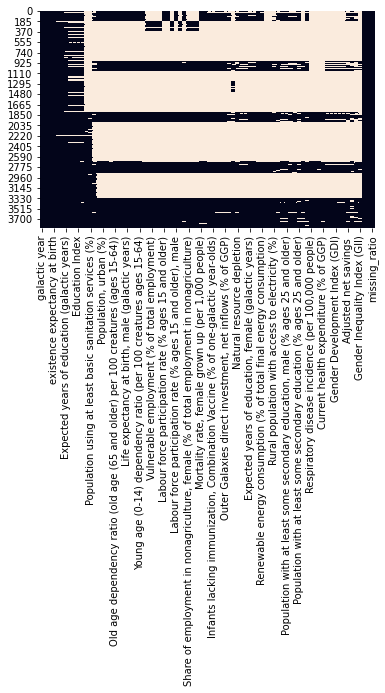

In [ ]:
sns.heatmap(galaxy_df.isnull(), cbar=False)

From the above, many variables have very little observations in them. As a first pass, it may be more useful to retain variables that have less than 20% missing data

In [ ]:
missing_value_threshold = 0.2 #this is maximum ratio of missing values a variable can have for it to be retained

missing_ratio = (len(galaxy_df) - galaxy_df.count()) / len(galaxy_df)
retained_variables = [item[0] for item in zip(missing_ratio.index, missing_ratio.values) if item[1] < missing_value_threshold]
galaxy_df = galaxy_df[retained_variables]
list(galaxy_df)

['galactic year',
 'galaxy',
 'existence expectancy index',
 'existence expectancy at birth',
 'Gross income per capita',
 'Income Index',
 'Expected years of education (galactic years)',
 'Mean years of education (galactic years)',
 'Intergalactic Development Index (IDI)',
 'Education Index',
 'Intergalactic Development Index (IDI), Rank',
 'y',
 'missing_values',
 'missing_ratio']

We thus retain the below variables 

- 'galactic year': represents the year in which measurements were taken, this variable is sequential and we should extract the 
    time difference between measurements for the same galaxies
- 'galaxy': name of the galaxy. this is repeated as multiple measures are taken for the same galaxy over time. this identifies our observational units
- 'existence expectancy index': a covariate, suspected to be similar to existence expectancy at birth
- 'existence expectancy at birth': a covariate, suspected to be similar to existence expectancy index
- 'Gross income per capita': a covariate, suspected to be similar to income index
- 'Income Index': a covariate, suspected to be similar to gross income per capita
- 'Expected years of education (galactic years)': a covariate, suspected to be similar to mean years of education and education index
- 'Mean years of education (galactic years)': a covariate, suspected to be similar to expected years of education and education index
- 'Intergalactic Development Index (IDI)': a covariate, suspected to be similar to Intergalactic Development Index, rank
- 'Education Index': a covariate, suspected to be similar to expected years of education and mean years of education
- 'Intergalactic Development Index (IDI), Rank': a covariate, suspected to be similar to Intergalactic Development Index
- 'y': dependent variable or target, an index that measures wellbeing

The covariates should belong to around 4 factors / dimensions. However, we may have better results by retaining certain variables that measure similar latent structures,
especially if any nonlinear or uncorrelated relationships exist between any variable pairs.

In [ ]:
galaxy_df.dropna(inplace=True)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


All observations with nas have been dropped as well. Data is now complete and 3430 of 3865 observations remain.

## correlations

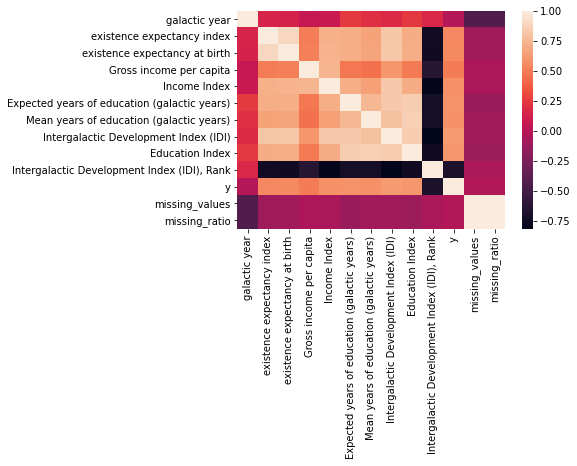

In [ ]:
galaxy_df_corr = galaxy_df.corr()
sns.heatmap(galaxy_df_corr)

In [ ]:
galaxy_df_corr

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",y,missing_values,missing_ratio
galactic year,1.000000,0.151360,0.144802,0.064139,0.081747,0.251533,0.209896,0.180855,0.243389,0.170417,-0.010291,-0.433758,-0.433758
existence expectancy index,0.151360,1.000000,0.904557,0.503765,0.724372,0.712851,0.660722,0.821269,0.704599,-0.734344,0.553047,-0.092854,-0.092854
existence expectancy at birth,0.144802,0.904557,1.000000,0.513387,0.731290,0.712728,0.667081,0.828927,0.710766,-0.738789,0.559911,-0.086012,-0.086012
Gross income per capita,0.064139,0.503765,0.513387,1.000000,0.740395,0.488994,0.454502,0.609414,0.494400,-0.628737,0.501401,-0.040960,-0.040960
Income Index,0.081747,0.724372,0.731290,0.740395,1.000000,0.715255,0.647421,0.831142,0.709014,-0.794393,0.584710,-0.054768,-0.054768
Expected years of education (galactic years),0.251533,0.712851,0.712728,0.488994,0.715255,1.000000,0.754529,0.832815,0.852797,-0.716693,0.594697,-0.113972,-0.113972
Mean years of education (galactic years),0.209896,0.660722,0.667081,0.454502,0.647421,0.754529,1.000000,0.797736,0.866842,-0.712597,0.586616,-0.092001,-0.092001
Intergalactic Development Index (IDI),0.180855,0.821269,0.828927,0.609414,0.831142,0.832815,0.797736,1.000000,0.845801,-0.815275,0.626267,-0.086775,-0.086775
Education Index,0.243389,0.704599,0.710766,0.494400,0.709014,0.852797,0.866842,0.845801,1.000000,-0.743798,0.615095,-0.107057,-0.107057
"Intergalactic Development Index (IDI), Rank",0.170417,-0.734344,-0.738789,-0.628737,-0.794393,-0.716693,-0.712597,-0.815275,-0.743798,1.000000,-0.681533,-0.055050,-0.055050


In [ ]:
%store galaxy_df

Stored 'galaxy_df' (DataFrame)
